In [1]:
#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Data

In [4]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

column = ['Sepal length','Sepal Width','Petal length','Petal Width','Class']

df = pd.read_csv(path, header=None , names=column , index_col=None)
df

,Sepal length,Sepal Width,Petal length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Data Description

In [6]:
df.describe()

,Sepal length,Sepal Width,Petal length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Pairplot

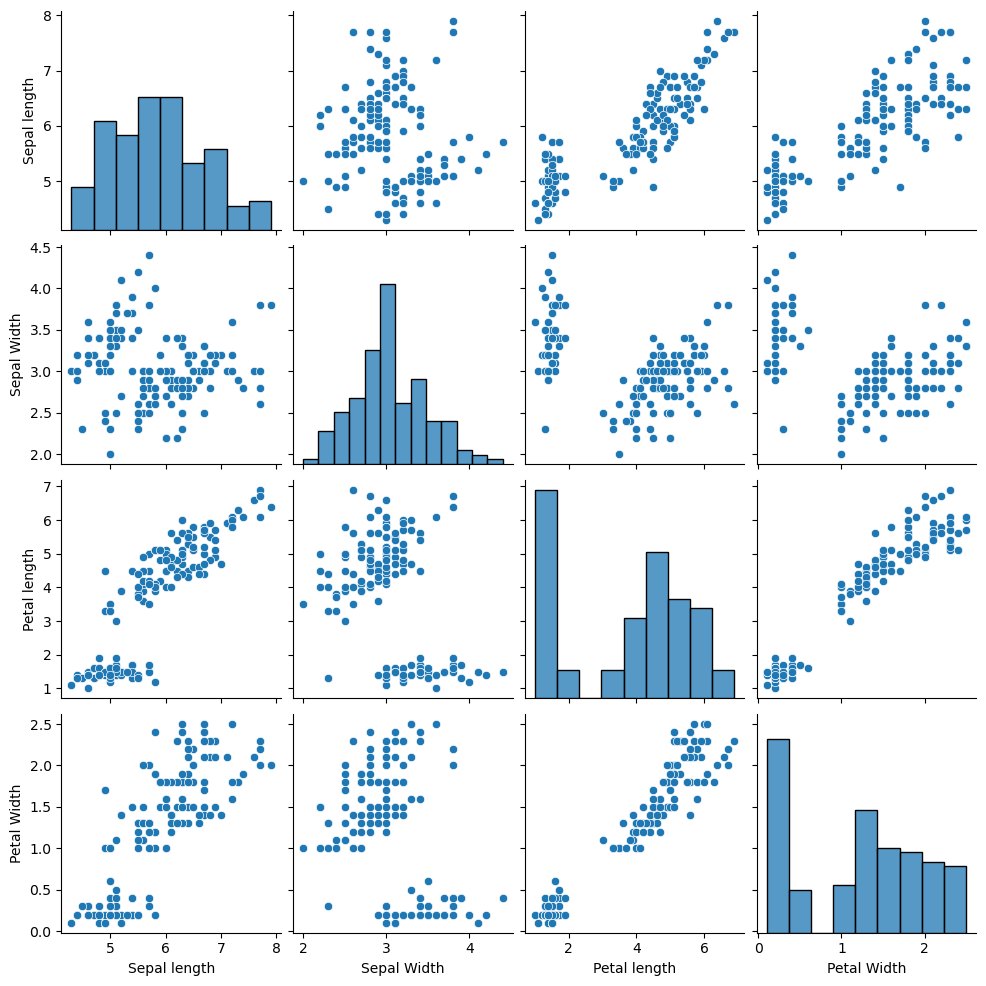

In [8]:
sns.pairplot(df)

<AxesSubplot:xlabel='Class', ylabel='count'>

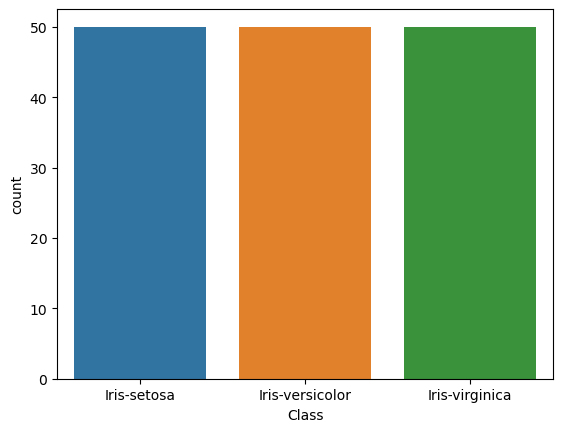

In [9]:
sns.countplot(x=df['Class'])

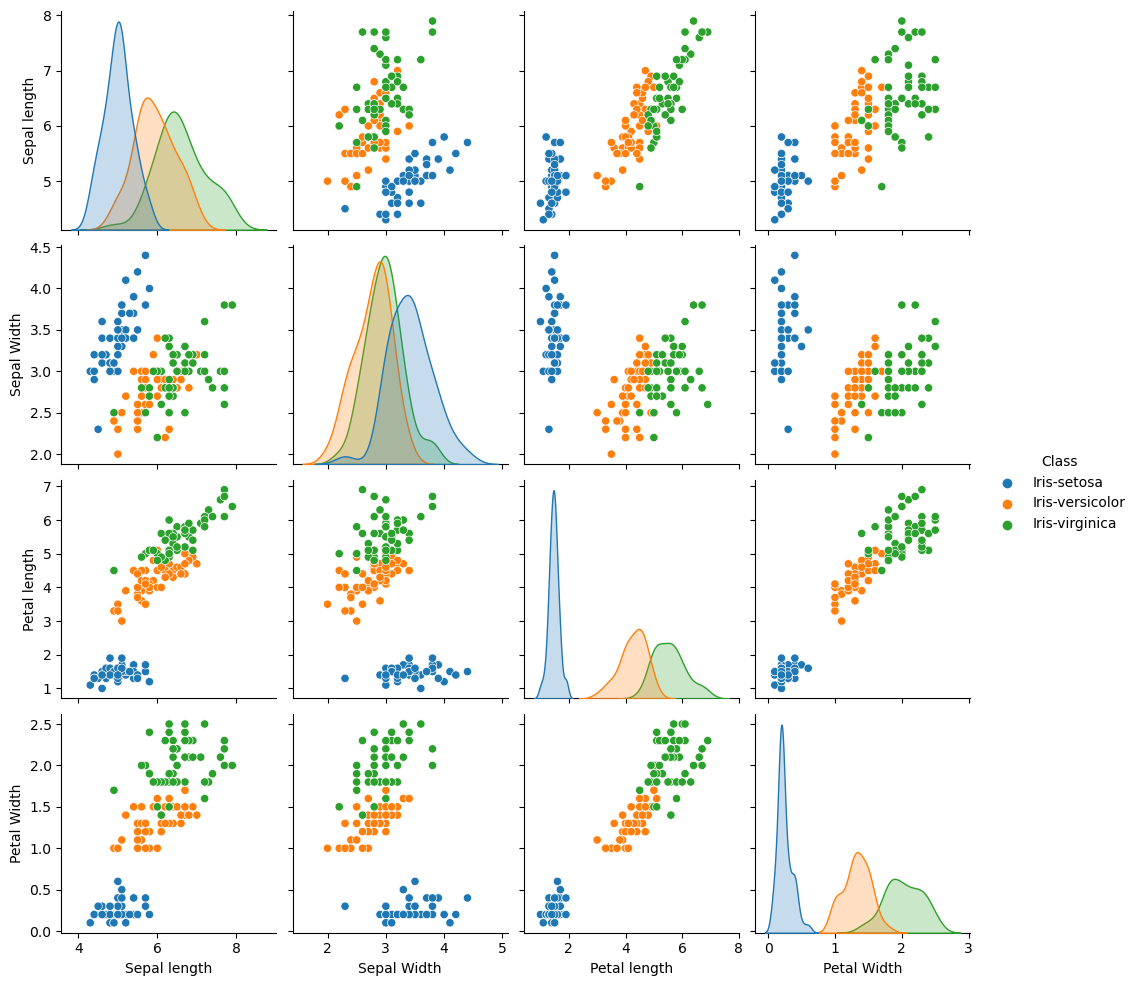

In [10]:
sns.pairplot(df,hue='Class')

In [11]:
#Encoding the target column

In [12]:
df['Class'].dtype

dtype('O')

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [15]:
le = LabelEncoder()

In [16]:
Y = le.fit_transform(Y)

In [17]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Model Building

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg = LogisticRegression()

In [22]:
lg.fit(X_train,Y_train)
pred = lg.predict(X_test)
print(f'Training Accuracy is: {lg.score(X_train,Y_train)}\nTesting Accuracy is: {lg.score(X_test,Y_test)}')

Training Accuracy is: 0.9821428571428571
Testing Accuracy is: 0.9736842105263158


In [23]:
from sklearn.svm import SVC

In [24]:
svm = SVC()

svm.fit(X_train,Y_train)
pred = svm.predict(X_test)

print(f'Training Accuracy is: {svm.score(X_train,Y_train)}\nTesting Accuracy is: {svm.score(X_test,Y_test)}')

Training Accuracy is: 0.9732142857142857
Testing Accuracy is: 0.9736842105263158


# Improving the Accuracy

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X

,Sepal length,Sepal Width,Petal length,Petal Width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [28]:
svm = SVC()

svm.fit(X_train,Y_train)
pred = svm.predict(X_test)

print(f'Training Accuracy is: {svm.score(X_train,Y_train)}\nTesting Accuracy is: {svm.score(X_test,Y_test)}')

Training Accuracy is: 0.9642857142857143
Testing Accuracy is: 0.9736842105263158


So the Not accuracy improved therefore the SVM accuracy is the best.We Relive on SVM

# Hyperparameter Tuning with GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {
    'C' : [0.001,0.01,1,10],
    'kernel':  ['linear','poly','rbf','sigmoid','percomputed'],
    'gamma': [0.001,0.01,1,10]
}

In [31]:
grid = GridSearchCV(SVC(),param_grid=params)

In [32]:
grid.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10],
                         'gamma': [0.001, 0.01, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                    'percomputed']})

In [33]:
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [34]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [35]:
grid.best_score_

0.9557312252964426

In [36]:
svm = SVC(C=10,gamma=0.01,kernel='rbf')

svm.fit(X_train,Y_train)
y_pred = svm.predict(X_test)
print(f'Training Accuracy is: {svm.score(X_train,Y_train)}\nTesting Accuracy is: {svm.score(X_test,Y_test)}')

Training Accuracy is: 0.9732142857142857
Testing Accuracy is: 0.9736842105263158
